In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

%matplotlib inline
sns.set_style("whitegrid")


In [4]:

from google.colab import files
uploaded = files.upload()

data = pd.read_csv('Titanic-Dataset.csv')

display(Markdown("## ✅ Dataset Loaded Successfully"))
display(data.head())


Saving Titanic_Cleaned.csv to Titanic_Cleaned (1).csv


## ✅ Dataset Loaded Successfully

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:

display(Markdown("## 📝 Dataset Information"))
data.info()

display(Markdown("## ⚠️ Missing Values"))
display(data.isnull().sum())


## 📝 Dataset Information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## ⚠️ Missing Values

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data = data.drop(columns=['Cabin'])

display(Markdown("## ✨ Missing Values Handled and Cabin Column Dropped"))

## ✨ Missing Values Handled and Cabin Column Dropped

In [8]:

survival_rate = data['Survived'].mean()
display(Markdown(f"## 🚢 Overall Survival Rate: **{survival_rate*100:.2f}%**"))


## 🚢 Overall Survival Rate: **38.38%**

## 👩‍👦 Survival Rate by Sex

,Survived
Sex,
female,0.742038
male,0.188908


/tmp/ipython-input-419220196.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=data, palette="Set2")


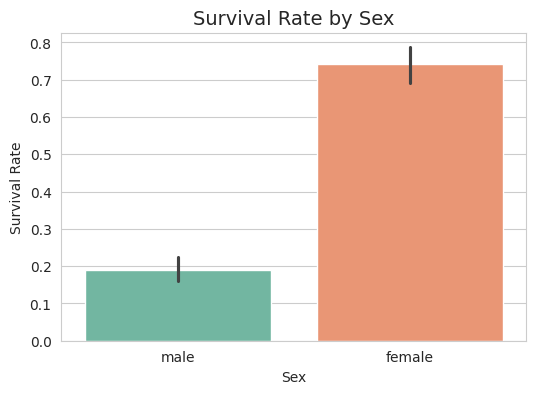

In [9]:
display(Markdown("## 👩‍👦 Survival Rate by Sex"))
sex_survival = data.groupby('Sex')['Survived'].mean()
display(sex_survival)

plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=data, palette="Set2")
plt.title('Survival Rate by Sex', fontsize=14)
plt.ylabel('Survival Rate')
plt.show()

## 🎟️ Survival Rate by Passenger Class (Pclass)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


/tmp/ipython-input-1210964616.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=data, palette="Set1")


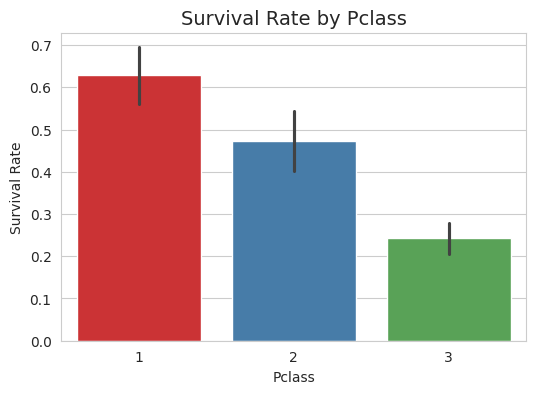

In [11]:
display(Markdown("## 🎟️ Survival Rate by Passenger Class (Pclass)"))
pclass_survival = data.groupby('Pclass')['Survived'].mean()
display(pclass_survival)

plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=data, palette="Set1")
plt.title('Survival Rate by Pclass', fontsize=14)
plt.ylabel('Survival Rate')
plt.show()



## 🛳️ Survival Rate by Embarked Port

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


/tmp/ipython-input-4263537453.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=data, palette="Accent")


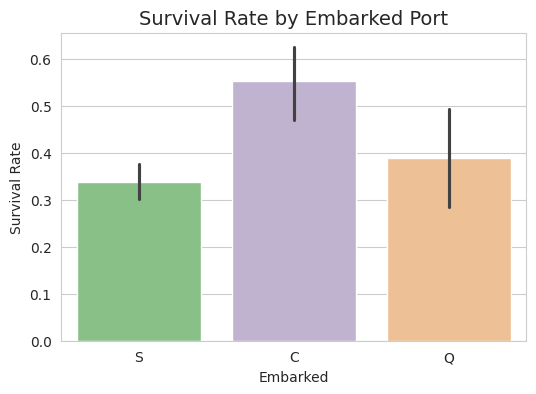

In [12]:
display(Markdown("## 🛳️ Survival Rate by Embarked Port"))
embarked_survival = data.groupby('Embarked')['Survived'].mean()
display(embarked_survival)

plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='Survived', data=data, palette="Accent")
plt.title('Survival Rate by Embarked Port', fontsize=14)
plt.ylabel('Survival Rate')
plt.show()

## 🎂 Age Distribution of Survivors vs Non-Survivors

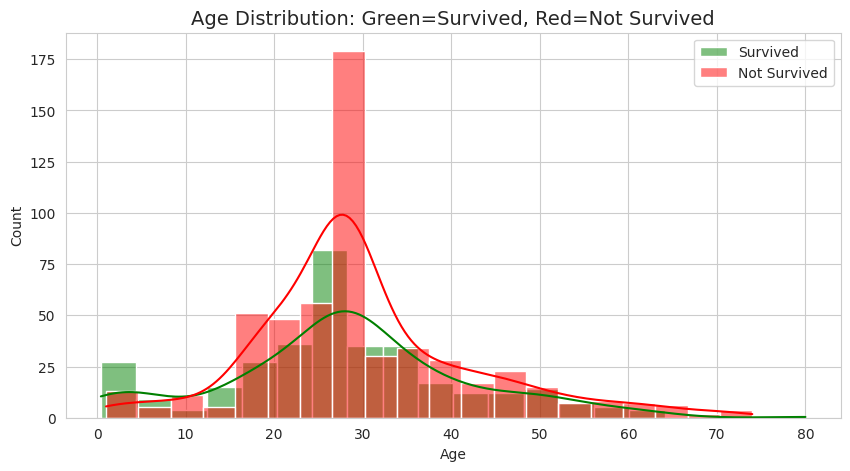

In [14]:
display(Markdown("## 🎂 Age Distribution of Survivors vs Non-Survivors"))
plt.figure(figsize=(10,5))
sns.histplot(data[data['Survived']==1]['Age'], bins=20, kde=True, color='green', label='Survived')
sns.histplot(data[data['Survived']==0]['Age'], bins=20, kde=True, color='red', label='Not Survived')
plt.legend()
plt.title('Age Distribution: Green=Survived, Red=Not Survived', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



In [15]:
data.to_csv('Titanic_Cleaned.csv', index=False)
files.download('Titanic_Cleaned.csv')

display(Markdown("## ✅ Cleaned Dataset Saved and Downloaded"))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## ✅ Cleaned Dataset Saved and Downloaded